In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cible(x):
    return 1. / (1. + np.sqrt(x))

In [21]:
taille_echantillon = 10

points = np.linspace(0, 1., taille_echantillon)
valeurs = cible(points)
donnees = valeurs + 0.1 * np.random.randn(taille_echantillon)

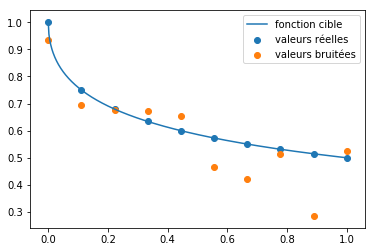

In [22]:
x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, label="fonction cible")
plt.scatter(points, valeurs, label="valeurs réelles")
plt.scatter(points, donnees, label="valeurs bruitées")
plt.legend()

## Imports sklearn

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.pipeline import make_pipeline

In [23]:
poly = PolynomialFeatures(degree=5)
poly

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [24]:
points.reshape((-1, 1))

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [27]:
X = poly.fit_transform(points.reshape((-1, 1)))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
        9.52598689e-02, 5.29221494e-02],
       [1.00000000e+00, 6.66666667e-01, 4.44444444e-01, 2.96296296e-01,
        1.97530864e-01, 1.31687243e-01],
       [1.00000000e+00, 7.77777778e-01, 6.04938272e-01, 4.70507545e-01,
        3.65950312e-01, 2.84628021e-01],
       [1.00000000e+00, 8.88888889e-01, 7.90123457e-01, 7.02331962e-01,
        6.24295077e-01, 

In [28]:
lr = LinearRegression(fit_intercept=False)

In [30]:
lr.fit(X, donnees)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [32]:
xs = np.linspace(0, 1, 100)
intermed = poly.transform(xs.reshape((-1, 1)))
ys = lr.predict(intermed)

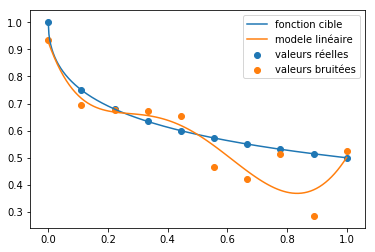

In [34]:
x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, label="fonction cible")
plt.scatter(points, valeurs, label="valeurs réelles")
plt.scatter(points, donnees, label="valeurs bruitées")
plt.plot(xs, ys, label='modele linéaire')
plt.legend()

In [36]:
lr.score(X, donnees)

0.8757006927037444

In [39]:
lr.coef_

array([  0.92742817,  -3.10280878,  13.89666428, -28.10604778,
        23.08253255,  -6.19642035])

# Exercice

Reprendre la méthodologie de la 2 eme séance avec ces nouveaux outils

- Prendre un plus gros échantillon
- Séparer entre jeu d'apprentissage et jeu de test
- Faire varier le degrés
- Evaluer le score sur les deux parties de l'échantillon
- Dessiner les deux courbes degres -> score
- Dessiner la courbe degres -> moyenne quadratique des coefficients du modele.
- Utiliser les algorithmes lasso et ridge_regression avec un grand degres mais en faisant varier les hyperparamètres pour obtenir des courbes similaires.

In [88]:
def generation_score(degres, points, donnees):
    """Fonction prenant le degrés du modèle et renvoyant 
    les scores sur la partie apprentissage et sur la partie test et la moyenne quadratique des coeffs
    """
    poly = PolynomialFeatures(degree=degres)
    X = poly.fit_transform(points.reshape((-1, 1)))
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, 
        donnees, 
        random_state=42,
    )
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_tr, y_tr)
    return lr.score(X_tr, y_tr), lr.score(X_te, y_te), np.mean(np.power(lr.coef_, 2))

In [80]:
taille_echantillon = 100
taille_bruit = 0.1

points = np.linspace(0, 1., taille_echantillon)
valeurs = cible(points)
donnees = valeurs + taille_bruit * np.random.randn(taille_echantillon)

Text(0.5,1,'moyenne quadratique des coefficients')

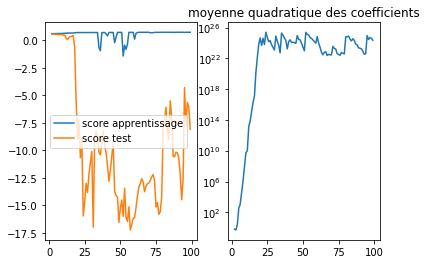

In [89]:
degres_max = 100

scores_te, scores_tr, coefs = list(), list(), list()
degres = [deg for deg in range(2, degres_max)]
for deg in degres:
    s_tr, s_te, coef = generation_score(deg, points, donnees)
    scores_te.append(s_te)
    scores_tr.append(s_tr)
    coefs.append(coef)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(degres, scores_tr, label="score apprentissage")
ax1.plot(degres, scores_te, label="score test")
ax1.legend()
ax2.semilogy(degres, coefs)
ax2.set_title("moyenne quadratique des coefficients")


In [55]:
from sklearn.linear_model import Lasso, Ridge

In [90]:
def generation_score_lasso(penalisation, degres, points, donnees):
    """Fonction prenant le degrés du modèle et renvoyant 
    les scores sur la partie apprentissage et sur la partie test et la moyenne quadratique des coeffs
    """
    poly = PolynomialFeatures(degree=degres)
    X = poly.fit_transform(points.reshape((-1, 1)))
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, 
        donnees, 
        random_state=42,
    )
    lr = Lasso(alpha=penalisation, fit_intercept=False)
    lr.fit(X_tr, y_tr)
    return lr.score(X_tr, y_tr), lr.score(X_te, y_te), np.mean(np.power(lr.coef_, 2))

Text(0.5,1,'moyenne quadratique des coefficients')

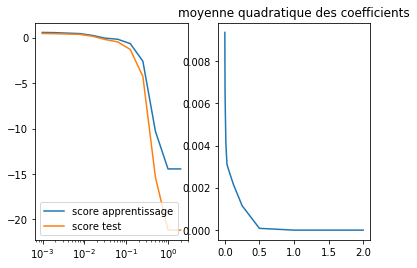

In [91]:
deg = 100

scores_te, scores_tr, coefs = list(), list(), list()
penalisations = [2 ** p for p in range(-10, 2)]
for penalisation in penalisations:
    s_tr, s_te, coef = generation_score_lasso(penalisation, deg, points, donnees)
    scores_te.append(s_te)
    scores_tr.append(s_tr)
    coefs.append(coef)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.semilogx(penalisations, scores_tr, label="score apprentissage")
ax1.semilogx(penalisations, scores_te, label="score test")
ax1.legend()
ax2.plot(penalisations, coefs)
ax2.set_title("moyenne quadratique des coefficients")


In [92]:
def generation_score_ridge(penalisation, degres, points, donnees):
    """Fonction prenant le degrés du modèle et renvoyant 
    les scores sur la partie apprentissage et sur la partie test et la moyenne quadratique des coeffs
    """
    poly = PolynomialFeatures(degree=degres)
    X = poly.fit_transform(points.reshape((-1, 1)))
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, 
        donnees, 
        random_state=42,
    )
    lr = Ridge(alpha=penalisation, fit_intercept=False)
    lr.fit(X_tr, y_tr)
    return lr.score(X_tr, y_tr), lr.score(X_te, y_te), np.mean(np.power(lr.coef_, 2))

Text(0.5,1,'moyenne quadratique des coefficients')

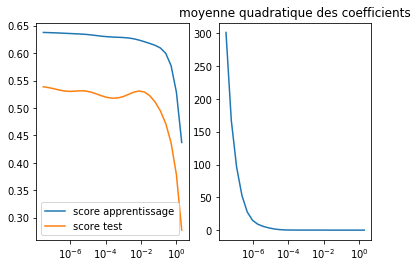

In [93]:
deg = 100

scores_te, scores_tr, coefs = list(), list(), list()
penalisations = [2 ** p for p in range(-25, 2)]
for penalisation in penalisations:
    s_tr, s_te, coef = generation_score_ridge(penalisation, deg, points, donnees)
    scores_te.append(s_te)
    scores_tr.append(s_tr)
    coefs.append(coef)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.semilogx(penalisations, scores_tr, label="score apprentissage")
ax1.semilogx(penalisations, scores_te, label="score test")
ax1.legend()
ax2.semilogx(penalisations, coefs)
ax2.set_title("moyenne quadratique des coefficients")
